# Bibliotecas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Quais estados e cidades tiveram mais consumidores?

In [5]:
consumidores = pd.read_csv('olist_customers_dataset.csv')

In [4]:
consumidores.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [10]:
cep_vendas.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [31]:
consumidores['customer_state'].value_counts() # Contagem de vendas por estado

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64

In [35]:
consumidores['customer_city'].value_counts() # Contagem de vendas por cidade, capitais do sudeste tem mais consumidores

customer_city
sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: count, Length: 4119, dtype: int64

In [20]:
sp = consumidores[consumidores['customer_state'] == 'SP'] # Contagem de vendas das cidades de São Paulo
cidades_sp = sp['customer_city'].value_counts()
print(cidades_sp)

customer_city
sao paulo                  15540
campinas                    1444
guarulhos                   1189
sao bernardo do campo        938
santo andre                  796
                           ...  
botelho                        1
aparecida de monte alto        1
novais                         1
santa clara d'oeste            1
natividade da serra            1
Name: count, Length: 629, dtype: int64


In [8]:
rj = consumidores[consumidores['customer_state'] == 'RJ'] # Contagem de vendas das cidades do Rio de Janeiro
cidades_rj = rj['customer_city'].value_counts()
print(cidades_rj)

customer_city
rio de janeiro              6882
niteroi                      849
nova iguacu                  442
sao goncalo                  409
duque de caxias              266
                            ... 
lidice                         1
purilandia                     1
santa rita da floresta         1
mussurepe                      1
sao sebastiao do paraiba       1
Name: count, Length: 149, dtype: int64


In [ ]:
cep_vendas = pd.read_csv('olist_geolocation_dataset.csv') # definindo o dataframe de ceps

In [9]:
cep_vendas['geolocation_zip_code_prefix'].value_counts() # Cep para onde foram feitas mais vendas
                                                         # Em uma pesquisa, descobre-se que os 2 primeiros ceps são
                                                         # da cidade de Niterói no bairro de Icaraí

geolocation_zip_code_prefix
24220    1146
24230    1102
38400     965
35500     907
11680     879
         ... 
71750       1
71742       1
26475       1
26357       1
29826       1
Name: count, Length: 19015, dtype: int64

In [37]:
eixo_x1 = consumidores['customer_state'].value_counts().keys() # definindo os eixos para plotar um gráfico de quantidade
eixo_y1 = consumidores['customer_state'].value_counts().values

In [32]:
contagem_states = consumidores['customer_state'].value_counts() # definindo os eixos para plotar um gráfico de porcentagem
porcent_states = 100 * contagem_states / contagem_states.sum()

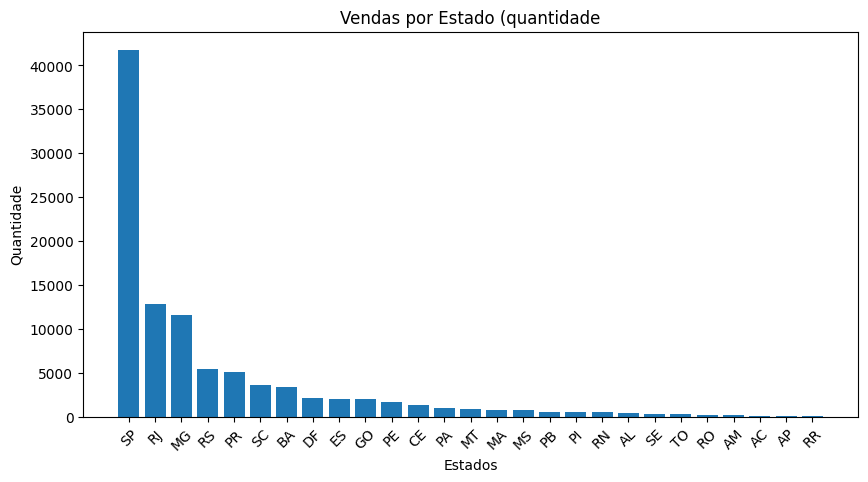

In [38]:
plt.figure(figsize=(10,5))
plt.bar(eixo_x1, eixo_y1)
plt.title('Vendas por Estado (quantidade')
plt.xlabel('Estados')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

# Que tipos de pagamentos são mais utilizados?

In [6]:
pagamentos_tipos = pd.read_csv('olist_order_payments_dataset.csv') # definindo o dataframe

In [24]:
pagamentos_tipos.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [3]:
pagamentos_tipos.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [30]:
pagamentos_tipos['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [25]:
eixo_x = pagamentos_tipos['payment_type'].value_counts().keys() # definindo os eixos para plotar um gráfico de quantidade
eixo_y = pagamentos_tipos['payment_type'].value_counts().values

In [22]:
contagem_pag = pagamentos_tipos['payment_type'].value_counts() # definindo os eixos para plotar um gráfico de porcentagem
porcent_pag = 100 * contagem_pag / contagem_pag.sum()

Text(0, 0.5, 'Quantidade')

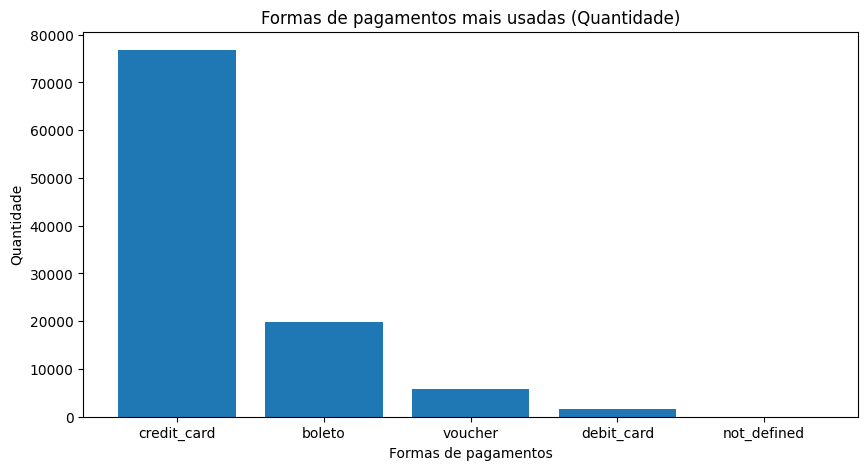

In [31]:
plt.figure(figsize=(10,5))  
plt.bar(eixo_x, eixo_y)
plt.title('Formas de pagamentos mais usadas (Quantidade)')
plt.xlabel('Formas de pagamentos')
plt.ylabel('Quantidade')

In [9]:
total_payments = pagamentos_tipos.groupby('payment_type')['payment_value'].sum()
print(total_payments)

payment_type
boleto          2869361.27
credit_card    12542084.19
debit_card       217989.79
not_defined           0.00
voucher          379436.87
Name: payment_value, dtype: float64


# Quais foram as notas de reviews mais registradas?

In [7]:
reviews = pd.read_csv('olist_order_reviews_dataset.csv')

In [3]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [4]:
reviews['review_score'].value_counts()

review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64

In [14]:
eixo_x3 = reviews['review_score'].value_counts().keys()
eixo_y3 = reviews['review_score'].value_counts().values

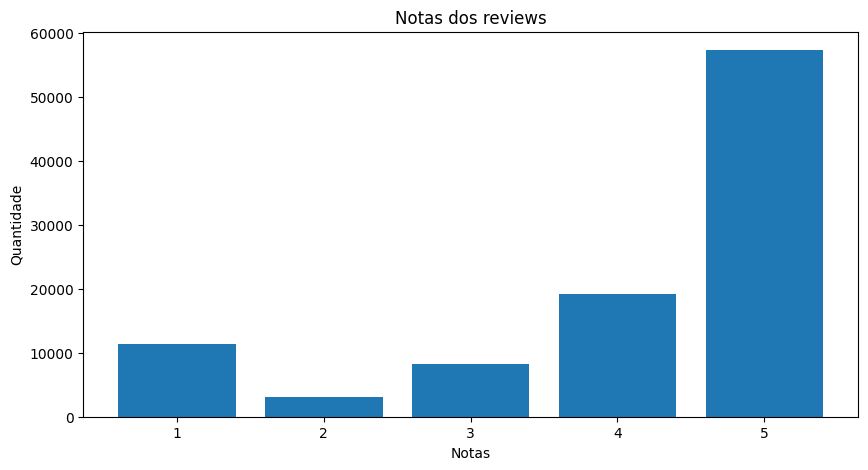

In [15]:
plt.figure(figsize=(10, 5))
plt.bar(eixo_x3, eixo_y3)
plt.title('Notas dos reviews')
plt.xlabel('Notas')
plt.ylabel('Quantidade')
plt.show()


In [157]:
ruim = reviews[reviews['review_score'] == 1] # Verificar os comentários da nota 1
ruim_coment = ruim['review_comment_message']
print(ruim_coment)

5                                                      NaN
19                                                 Péssimo
29                     Não gostei ! Comprei gato por lebre
32       Sempre compro pela Internet e a entrega ocorre...
39                            Nada de chegar o meu pedido.
                               ...                        
99144                                                  NaN
99155    Eu recebi o seguinte email e preciso saber com...
99169    Boa tarde. \r\nNão recebo todos os produtos fa...
99184                                                  NaN
99223    meu produto chegou e ja tenho que devolver, po...
Name: review_comment_message, Length: 11424, dtype: object


In [160]:
palavra_chave = 'não recebi'                            # Função para buscar uma palavra chave
comentarios_palavra_chave = ruim_coment[ruim_coment.str.contains(palavra_chave, case=False, na=False)]

print(comentarios_palavra_chave)

32       Sempre compro pela Internet e a entrega ocorre...
149      EU NÃO RECEBI O PRODUTO E CONSTA NO SISTEMA QU...
169      fiz minha compra faz 30 dias e não recebi aind...
197      aqui está descrevendo como entregue só que ate...
245                        até agora não recebi o produto.
                               ...                        
98866    Cancelei a compra e a parcela aparece na fatur...
98878             Até o momento não recebi o produto pago 
98895    ja estou esperando a um mês e não recebi o pro...
98972    Quero a devolução do meu dinheiro.. não recebi...
99081    Meus pedidos estão dando como entregues , mais...
Name: review_comment_message, Length: 1397, dtype: object


# Quais produtos foram mais vendidos durante todo o período?

In [123]:
produtos_vendas = pd.read_csv('olist_order_items_dataset.csv')  # definindo os dataframes
tipos_produtos = pd.read_csv('olist_products_dataset.csv')

In [12]:
produtos_vendas.head() # visualização dos dados

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [13]:
tipos_produtos.head() # visualização dos dados

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [124]:
produtos_comb = pd.merge(produtos_vendas, tipos_produtos, on='product_id', how='inner') # Unindo os 2 datasets para/
                                                                                       # poder visualizar os tipos de 
                                                                                     # produtos mais vendidos

In [19]:
produtos_comb.head() # visualização do novo dataframe

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


In [125]:
produtos_comb['product_category_name'].value_counts() # Contagem da categoria de produtos mais vendidos

product_category_name
cama_mesa_banho                  11115
beleza_saude                      9670
esporte_lazer                     8641
moveis_decoracao                  8334
informatica_acessorios            7827
                                 ...  
cds_dvds_musicais                   14
la_cuisine                          14
pc_gamer                             9
fashion_roupa_infanto_juvenil        8
seguros_e_servicos                   2
Name: count, Length: 73, dtype: int64

In [137]:
eixo_x4 = produtos_comb['product_category_name'].value_counts().head(10).keys()
eixo_y4 = produtos_comb['product_category_name'].value_counts().head(10).values

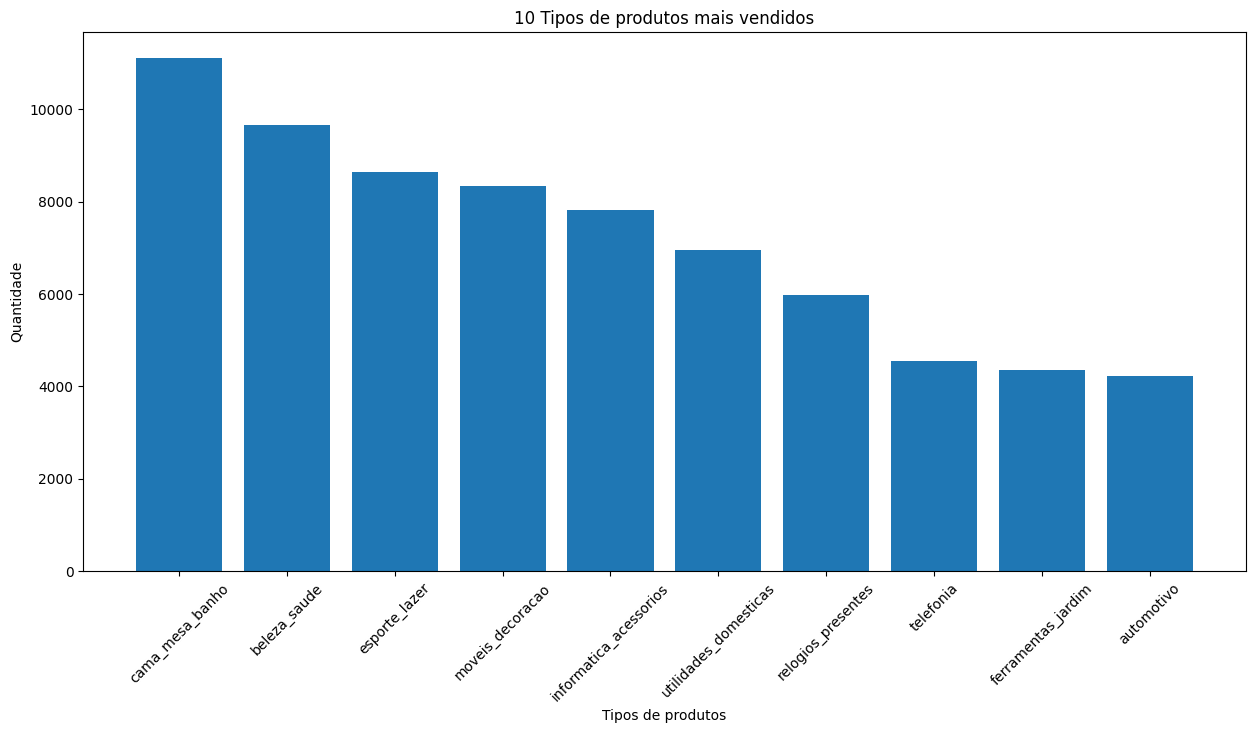

In [140]:
plt.figure(figsize=(15,7))
plt.bar(eixo_x4,eixo_y4)
plt.title('10 Tipos de produtos mais vendidos')
plt.xlabel('Tipos de produtos')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

# Quais dias de compras foram mais registrados?

In [9]:
datas_vendas = pd.read_csv('olist_orders_dataset.csv') # Definindo o dataframe

In [10]:
vendas_datas = pd.merge(produtos_vendas, datas_vendas, on='order_id', how='inner') # Mesclando 2 dataframes para ajudar na visualização

In [34]:
vendas_datas.head() # verificando o dataframe

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13,2017-09-13,2017-09-19,2017-09-20,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26,2017-04-26,2017-05-04,2017-05-12,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14,2018-01-14,2018-01-16,2018-01-22,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08,2018-08-08,2018-08-10,2018-08-14,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04,2017-02-04,2017-02-16,2017-03-01,2017-03-17


In [11]:
colunas_data = ['shipping_limit_date','order_purchase_timestamp','order_approved_at',
                'order_delivered_carrier_date','order_delivered_customer_date',
               'order_estimated_delivery_date']  # definindo quais colunas serão alteradas para que fique somente a data de compra

In [12]:
vendas_datas[colunas_data] = vendas_datas[colunas_data].apply(lambda x: pd.to_datetime(x).dt.date) 
# Alterando o formato da data excluindo o horario do dataframe

In [84]:
vendas_datas['order_purchase_timestamp'].value_counts().head(20) # Em uma pesquisa pude verificar que no dia 24/11/2017 aconteceu a black friday
                                                                 # No dia 07/08/2018 as compras podem ter sido influenciadas por causa do dia dos Pais
                                                                 # As vendas no mês de maio foram inflluenciados pelo dia das Mães

order_purchase_timestamp
2017-11-24    1366
2017-11-25     580
2017-11-27     474
2017-11-26     456
2018-08-07     431
2017-11-28     431
2018-08-06     430
2018-05-15     423
2018-05-07     421
2018-05-14     413
2018-05-16     406
2018-05-09     392
2018-05-08     378
2018-07-31     377
2017-12-04     369
2018-03-19     366
2018-02-27     366
2017-11-29     366
2018-01-16     362
2018-02-22     362
Name: count, dtype: int64

# Produtos mais vendidos em um dia

In [16]:
vendas_datas1 = vendas_datas.drop(columns=['shipping_limit_date','order_estimated_delivery_date','order_delivered_customer_date','order_delivered_carrier_date',])
produtos_comb1 = produtos_comb.drop(columns=['shipping_limit_date','product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm',
                           'product_height_cm','product_width_cm','freight_value','price','seller_id','order_item_id','order_id'])
# Excluindo algumas colunas para o dataframe ficar mais limpo

In [45]:
vendas_datas1.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13,2017-09-13
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26,2017-04-26
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14,2018-01-14
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08,2018-08-08
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04,2017-02-04


In [46]:
produtos_comb1.head()

,product_id,product_category_name
0,4244733e06e7ecb4970a6e2683c13e61,cool_stuff
1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff
2,4244733e06e7ecb4970a6e2683c13e61,cool_stuff
3,4244733e06e7ecb4970a6e2683c13e61,cool_stuff
4,4244733e06e7ecb4970a6e2683c13e61,cool_stuff


In [17]:
prod_vend = pd.merge(vendas_datas1,produtos_comb1,on='product_id',how='inner') # Mesclando os 2 dataframes

In [19]:
prod_vend.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13,2017-09-13,cool_stuff
1,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13,2017-09-13,cool_stuff
2,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13,2017-09-13,cool_stuff
3,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13,2017-09-13,cool_stuff
4,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13,2017-09-13,cool_stuff


In [153]:
data_especifica = '2018-05-07'        # FUNÇÃO PARA BUSCAR SOMENTE 1 DIA ESPECIFICO

def buscar_vendas_por_data(prod_vend, data_especifica):
    
    data_especifica = pd.to_datetime(data_especifica).date()  # Convertendo o input no formato de data
    
    vendas_na_data = prod_vend[prod_vend['order_purchase_timestamp'].dt.date == data_especifica] # Filtro para buscar apenas as vendas na data especifica
    
    if vendas_na_data.empty:
        return f"Não há registros de vendas para a data especificada: {data_especifica}."   # Verificando se não há vendas na data especificada
    
    else:
        return vendas_na_data  # Retornando todas as linhas correspondentes à data especificada

resultado = buscar_vendas_por_data(prod_vend, data_especifica)  # Dataframe final

In [154]:
resultado.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,product_category_name
398250,19b0850bcc97d9186957e4dd2c36ac40,1,89321f94e35fc6d7903d36f74e351d40,16090f2ca825584b5a147ab24aa30c86,27.9,7.87,496d45d232b2572ba50dc3a5e1162518,delivered,2018-05-07,2018-05-07,alimentos
398251,19b0850bcc97d9186957e4dd2c36ac40,1,89321f94e35fc6d7903d36f74e351d40,16090f2ca825584b5a147ab24aa30c86,27.9,7.87,496d45d232b2572ba50dc3a5e1162518,delivered,2018-05-07,2018-05-07,alimentos
398252,19b0850bcc97d9186957e4dd2c36ac40,1,89321f94e35fc6d7903d36f74e351d40,16090f2ca825584b5a147ab24aa30c86,27.9,7.87,496d45d232b2572ba50dc3a5e1162518,delivered,2018-05-07,2018-05-07,alimentos
398253,19b0850bcc97d9186957e4dd2c36ac40,1,89321f94e35fc6d7903d36f74e351d40,16090f2ca825584b5a147ab24aa30c86,27.9,7.87,496d45d232b2572ba50dc3a5e1162518,delivered,2018-05-07,2018-05-07,alimentos
398254,19b0850bcc97d9186957e4dd2c36ac40,1,89321f94e35fc6d7903d36f74e351d40,16090f2ca825584b5a147ab24aa30c86,27.9,7.87,496d45d232b2572ba50dc3a5e1162518,delivered,2018-05-07,2018-05-07,alimentos


In [155]:
resultado['product_category_name'].value_counts()  # Uma contagem dos produtos mais vendidos

product_category_name
relogios_presentes                   6227
ferramentas_jardim                   2743
beleza_saude                         2519
moveis_decoracao                     1988
informatica_acessorios                792
casa_conforto                         660
cama_mesa_banho                       588
utilidades_domesticas                 483
eletronicos                           467
telefonia                             403
cool_stuff                            266
bebes                                 239
esporte_lazer                         220
brinquedos                            165
moveis_escritorio                     162
alimentos                             119
artes                                 113
casa_construcao                        93
pet_shop                               92
livros_tecnicos                        90
papelaria                              72
perfumaria                             65
eletroportateis                        64
instrumentos

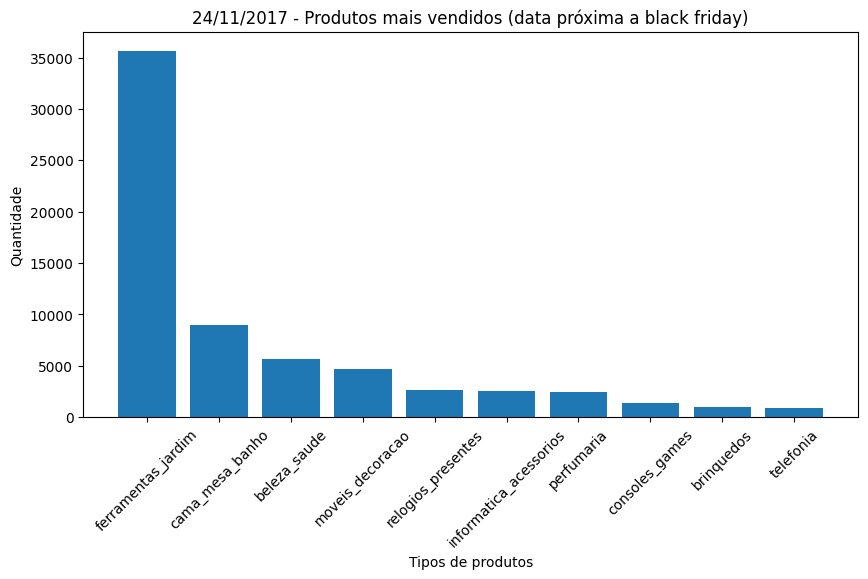

In [146]:
eixo_x5 = resultado['product_category_name'].value_counts().head(10).keys() # Data proxima a black friday
eixo_y5 = resultado['product_category_name'].value_counts().head(10).values

plt.figure(figsize=(10,5))
plt.bar(eixo_x5,eixo_y5)
plt.title('24/11/2017 - Produtos mais vendidos (data próxima a black friday)')
plt.xlabel('Tipos de produtos')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

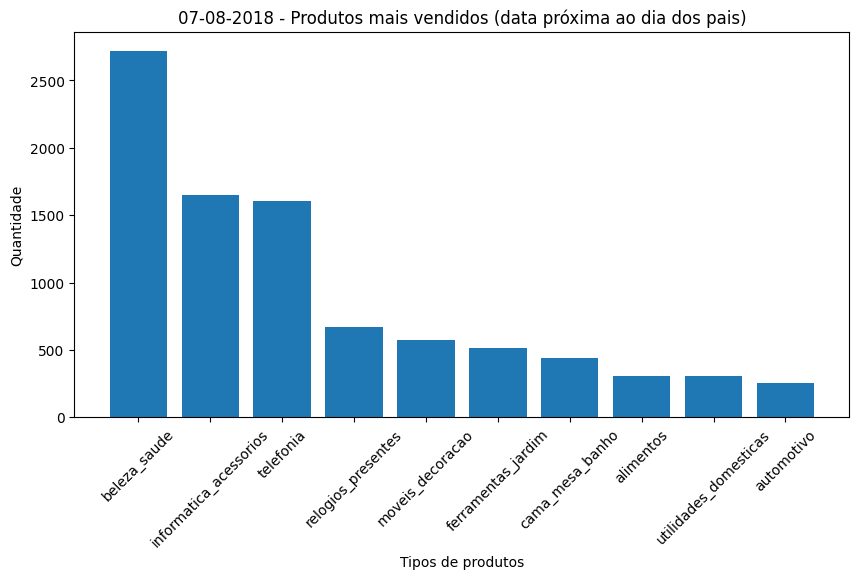

In [152]:
eixo_x5 = resultado['product_category_name'].value_counts().head(10).keys() # Data proxima ao dia dos pais
eixo_y5 = resultado['product_category_name'].value_counts().head(10).values

plt.figure(figsize=(10,5))
plt.bar(eixo_x5,eixo_y5)
plt.title('07-08-2018 - Produtos mais vendidos (data próxima ao dia dos pais)')
plt.xlabel('Tipos de produtos')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

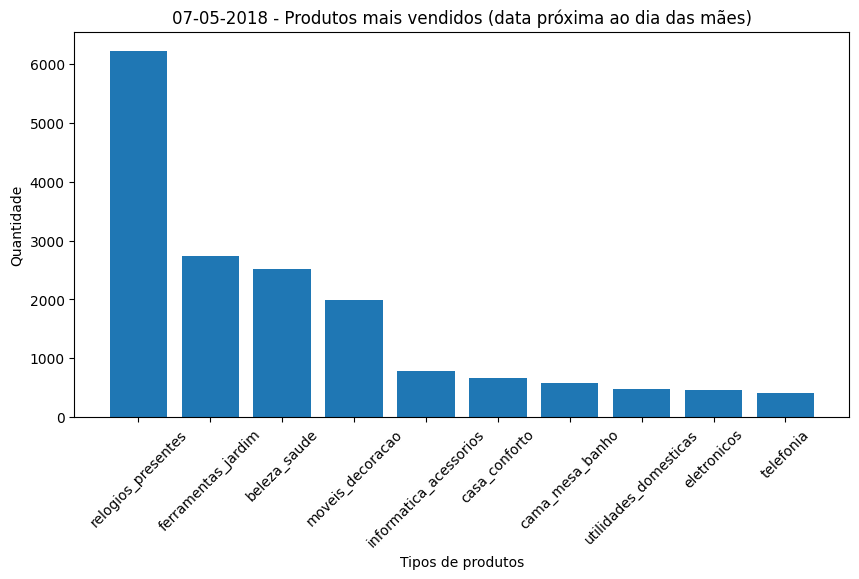

In [156]:
eixo_x5 = resultado['product_category_name'].value_counts().head(10).keys() # Data proxima ao dia das mães
eixo_y5 = resultado['product_category_name'].value_counts().head(10).values

plt.figure(figsize=(10,5))
plt.bar(eixo_x5,eixo_y5)
plt.title('07-05-2018 - Produtos mais vendidos (data próxima ao dia das mães)')
plt.xlabel('Tipos de produtos')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

# Existe diferenças nas vendas de 2017 e 2018?

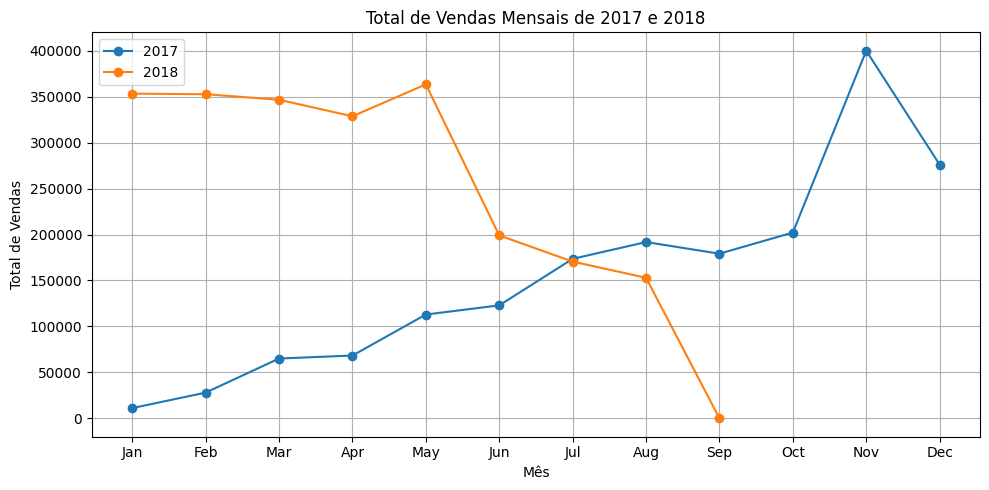

In [166]:

prod_vend['order_purchase_timestamp'] = pd.to_datetime(prod_vend['order_purchase_timestamp'])

# Criar colunas de ano e mês
prod_vend['year'] = prod_vend['order_purchase_timestamp'].dt.year
prod_vend['month'] = prod_vend['order_purchase_timestamp'].dt.month

# Filtrar dados para os anos de 2017 e 2018
vendas_2017_2018 = prod_vend[prod_vend['year'].isin([2017, 2018])]

# Agrupar por ano e mês, e somar as vendas
vendas_mensais = vendas_2017_2018.groupby(['year', 'month']).agg({'order_id': 'count'}).reset_index()

# Pivotar para ter colunas separadas para cada ano
vendas_pivot = vendas_mensais.pivot(index='month', columns='year', values='order_id')

# Plotar o gráfico de linha
plt.figure(figsize=(10, 5))
plt.plot(vendas_pivot.index, vendas_pivot[2017], label='2017', marker='o')
plt.plot(vendas_pivot.index, vendas_pivot[2018], label='2018', marker='o')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.title('Total de Vendas Mensais de 2017 e 2018')
plt.xticks(vendas_pivot.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
